In [1]:
import sys
# can't relative import with sister directory
sys.path.insert(0, "..")

from torchvision import transforms
import PIL
import torch
import os
import numpy as np

from cocpit.interpretability import captum_interp
from cocpit import config as config

torch.manual_seed(0)
np.random.seed(0)

%load_ext autoreload
%autoreload 2

In [2]:
model = torch.load(
    "/home/vanessa/hulk/cocpit/saved_models/no_mask/v1.4.0/e[30]_bs[64]_k2_vgg16.pt"
)
basedir = "/home/vanessa/hulk/cocpit/cpi_data/training_datasets/v3.1.0/hand_labeled_noaug/bullet/"
# model expectation is 224x224 3-color image
transform = transforms.Compose([
 transforms.Resize(224),
 transforms.CenterCrop(224), #crop the given tensor image at the center
 transforms.ToTensor()
])
# ImageNet normalization
transform_normalize = transforms.Normalize(
     mean=[0.485, 0.456, 0.406],
     std=[0.229, 0.224, 0.225]
 )

img = PIL.Image.open(f"{basedir}/2004_1017_223801_164_39.png").convert('RGB')

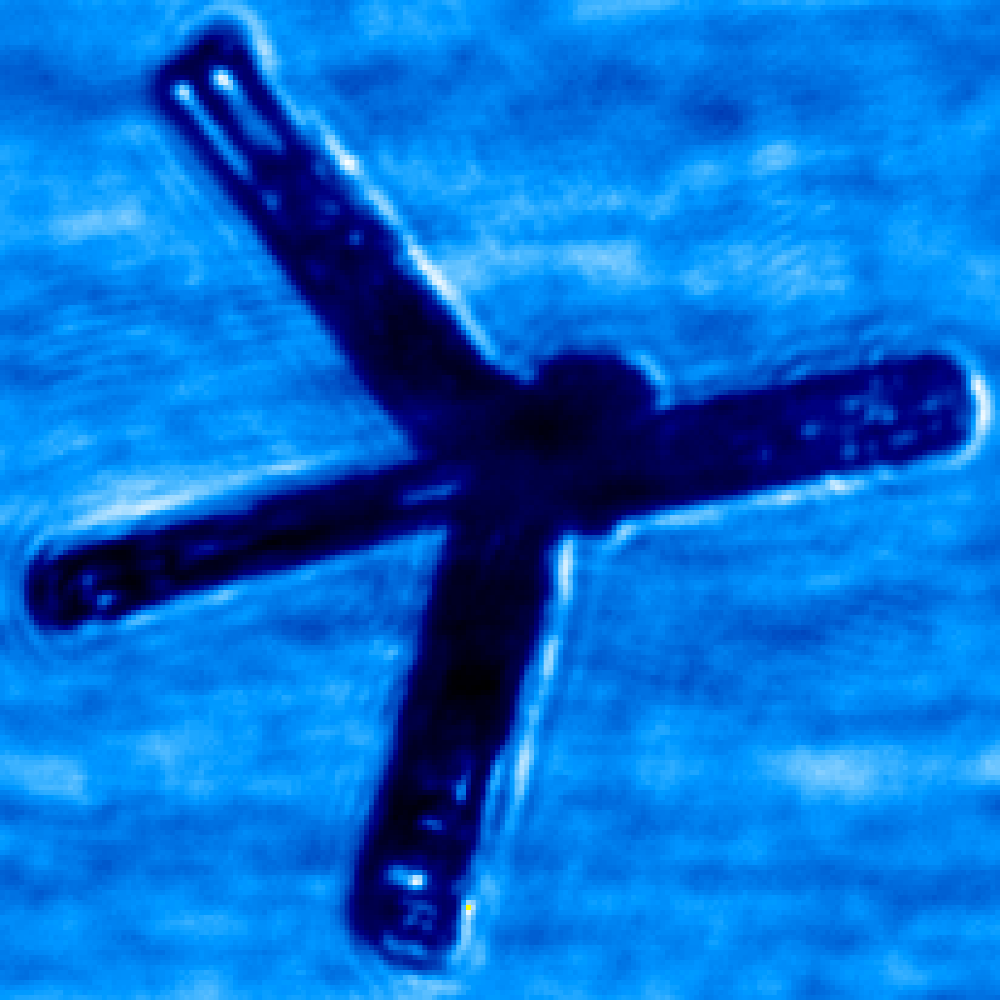

In [5]:
img

In [3]:
c = captum_interp.Captum(model, img)
c.transform_input(transform, transform_normalize)
c.get_target_class()
attributions_ig = c.integrated_grads()


/usr/local/lib/python3.9/site-packages/torch/nn/parallel/comm.py:231: UserWarning: Using -1 to represent CPU tensor is deprecated. Please use a device object or string instead, e.g., "cpu".
  warnings.warn(


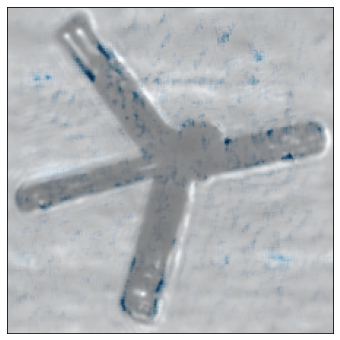

(<Figure size 432x432 with 1 Axes>, <AxesSubplot:>)

In [44]:
c.grad_heatmap()

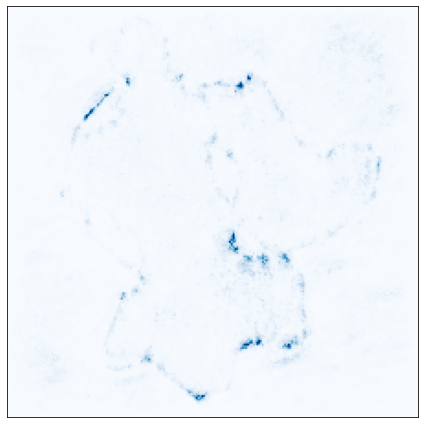

In [ ]:
c.noise_tunnel_smoothing()

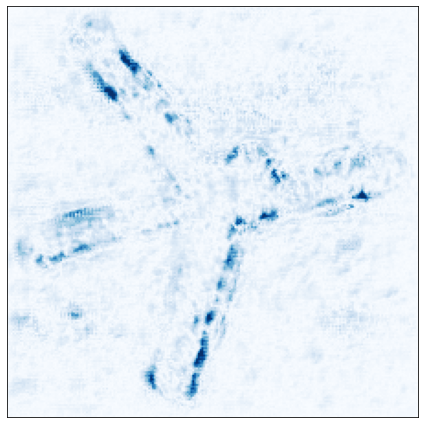

In [4]:
c.gradient_shap()

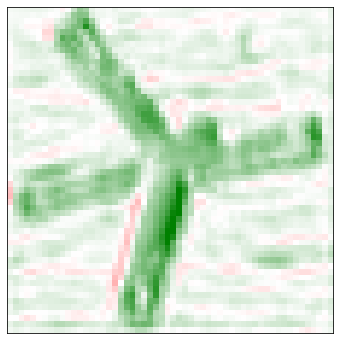

In [7]:
c.layer_gradcam()

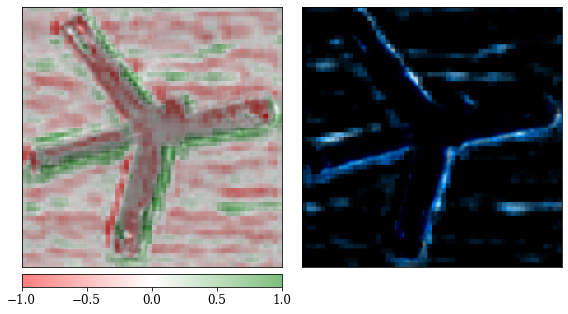

In [6]:
c.layer_attributions()